# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import warnings
import pickle

random.seed(42)
np.random.seed(42)
warnings.filterwarnings('ignore')

In [129]:
target = 'selling_price'

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [130]:
print("Для возможности повторного воспроизведения результатов.")

Для возможности повторного воспроизведения результатов.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [131]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [132]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [133]:
# first 5

df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [134]:
# last 5

df_train.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [135]:
df_train.describe(include ='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [136]:
df_train.isna().sum().sort_values(ascending=False)

torque           203
mileage          202
engine           202
seats            202
max_power        196
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

In [137]:
cols_with_nan = df_train.isna().sum()[df_train.isna().sum() > 0].index.values

print(f"Пропуски есть в признаках: {cols_with_nan}")

Пропуски есть в признаках: ['mileage' 'engine' 'max_power' 'torque' 'seats']


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [138]:
duplicates = df_train.drop(target, axis=1).duplicated()

print(f"В данных {duplicates.sum()} дупликатов")

В данных 1159 дупликатов


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [141]:
df_train[duplicates]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [142]:
df_train.drop(duplicates[duplicates == True].index, inplace=True)

In [143]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [144]:
df_train = df_train.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [40]:
def treat_torque(dataframe):
    """
    Function extract Nm and rpm features from torque feature
    and delete it
    """
    # rpm
    dataframe['rpm_torque'] = dataframe['torque'].apply(
        lambda x: x if type(x) == float else ' '.join(x.split(" ")[1:]).replace(',', '')
    ).apply(
        lambda x: x if type(x) == float else re.findall('\d+', str(x))
    ).apply(
        lambda x: x if type(x) == float else np.mean([int(i) for i in x])
    )
    # Nm
    dataframe['nm_torque'] = dataframe['torque'].apply(
        lambda x: x if type(x) == float else x.split(' ')[0]
    ).apply(
        lambda x: re.findall('\d+', str(x))
    ).apply(
        lambda x: x if type(x) == float else ('.'.join([i for i in x]) if len(x) <= 2 else x[0])
    ).replace('', np.nan).apply(
        lambda x: float(x) if float(x) > 25 else float(x) * 9.8
    )

    dataframe.drop('torque', axis=1, inplace=True)

    return dataframe

In [145]:
df_train = treat_torque(df_train)
df_test = treat_torque(df_test)

In [42]:
def extract_numbers(data):
    """
    Function extracts numbers from mileage, max_power and engine
    """
    for col in ['mileage', 'max_power', 'engine']:
        data[col] = data[col].apply(
            lambda x: '.'.join((re.findall('\d+', str(x))))
        ).replace('', np.nan).apply(
            lambda x: float(x)
        )

    return data

In [146]:
df_train = extract_numbers(df_train)
df_test = extract_numbers(df_test)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [147]:
from sklearn.impute import SimpleImputer

In [148]:
cols_with_nan = df_train.columns[df_train.isna().sum() > 0]

si = SimpleImputer(strategy='median')

si.fit(df_train[cols_with_nan])

df_train[cols_with_nan] = si.transform(df_train[cols_with_nan])
df_test[cols_with_nan] = si.transform(df_test[cols_with_nan])

In [46]:
# save imputer

pickle.dump(si, open('simple_imputer.pkl', 'wb'))

In [149]:
assert df_train.isna().sum().sum() == 0, 'There are still nans in train data'
assert df_test.isna().sum().sum() == 0, 'There are still nans in test data'


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [150]:
print("Потому что не всегда цена линейно зависит от количества сидений в машине. Старенький минивен с 7 сиденьями чаще всего стоит дешевле 2 местного Porsche 911")

Потому что не всегда цена линейно зависит от количества сидений в машине. Старенький минивен с 7 сиденьями чаще всего стоит дешевле 2 местного Porsche 911


In [151]:
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

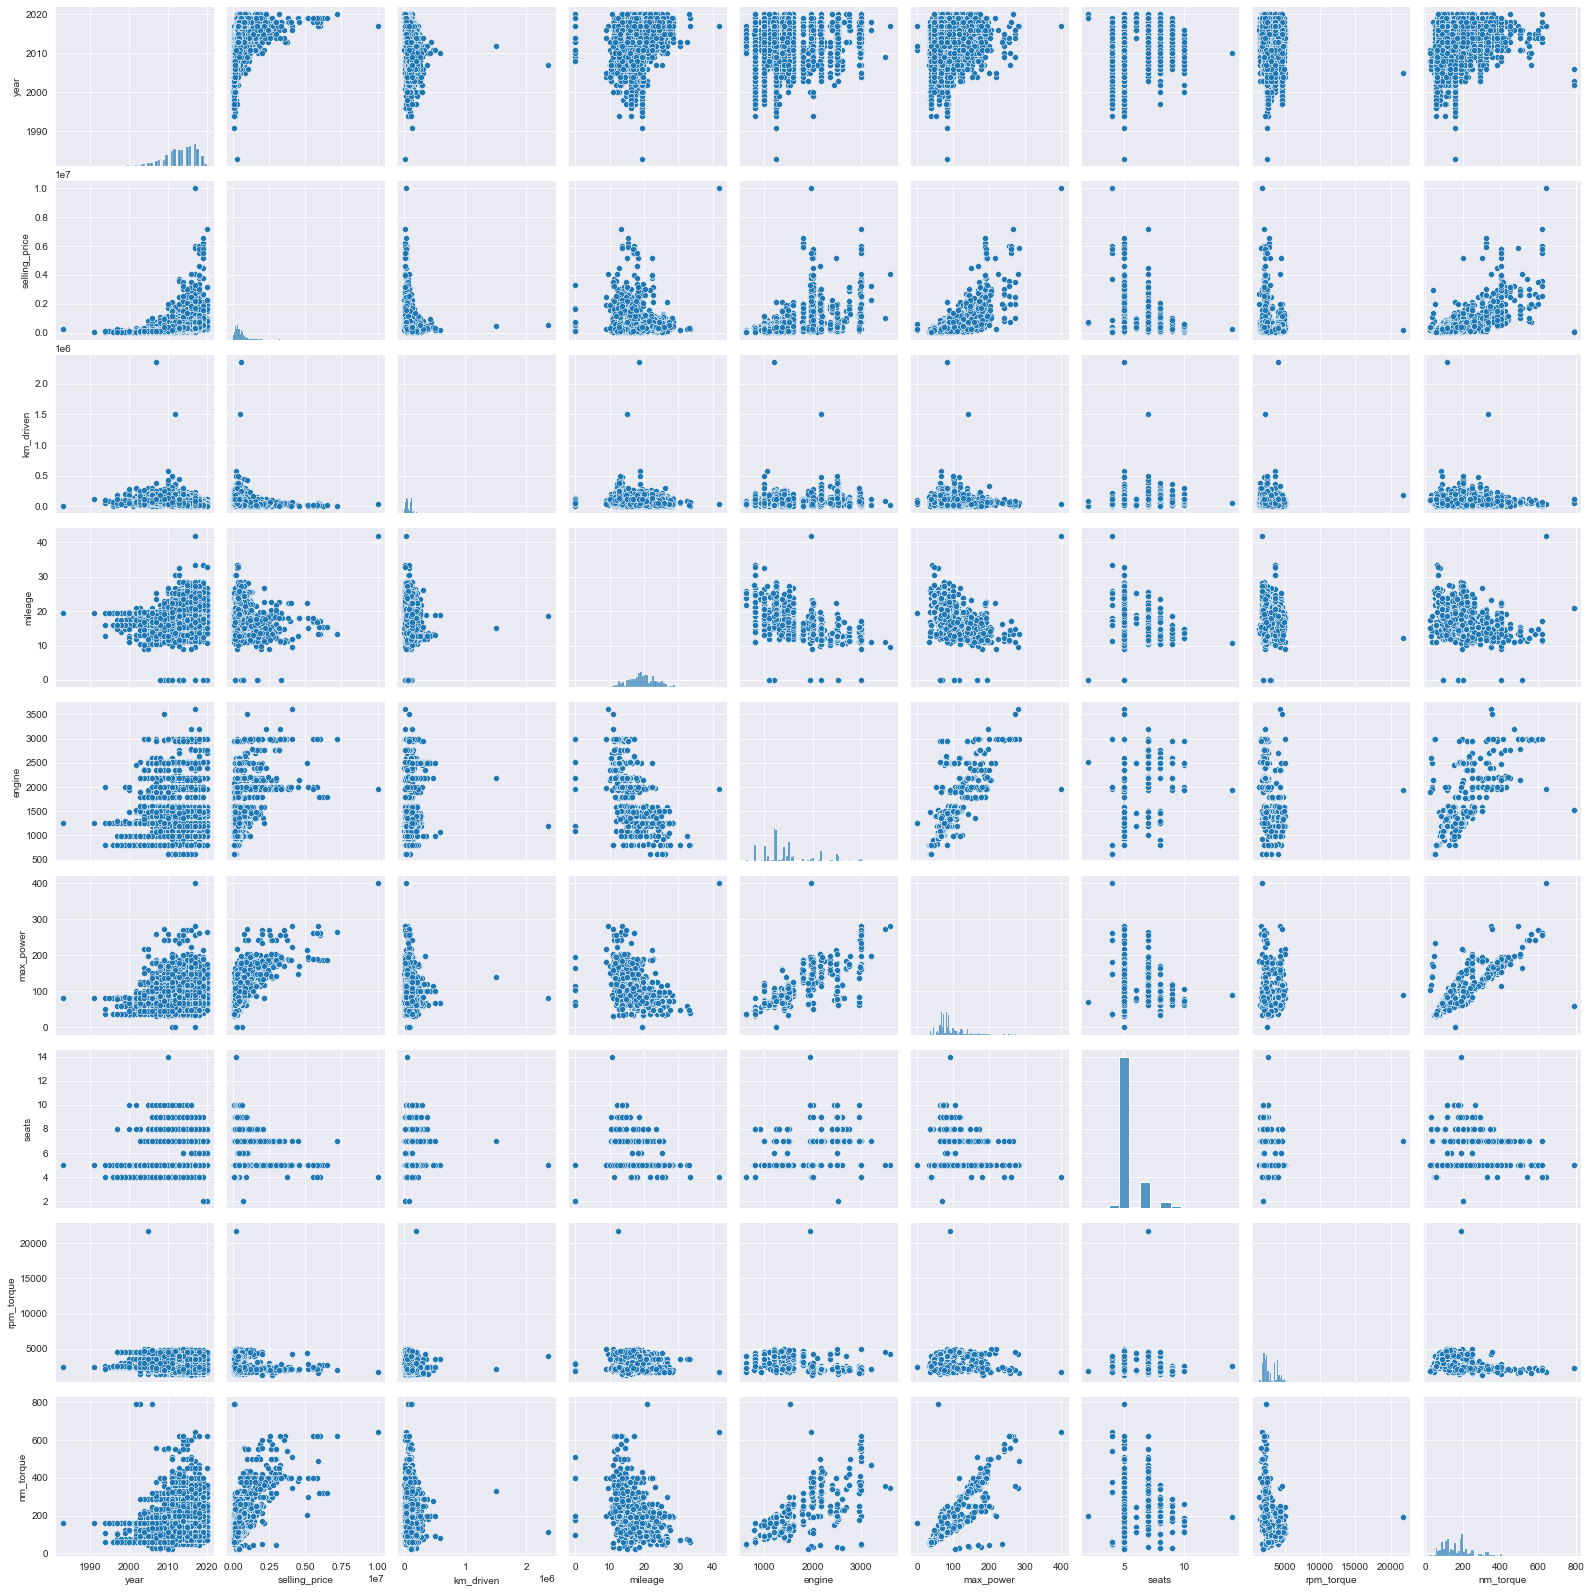

In [24]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

- Связь целевой переменной с предикторами:
    1) Стоимость старых автомобилей одинаково низкая, а чем свежее автомобиль, тем больше встречаются высокие цены;
    2) Чем выше пробег, тем реже встречаются высокие цены;
    3) Линейная связь целевой переменной наблюдается с признаками: rpm_torque & max_power

- Корреляция признаков, кажется, что корреляция присутсвует у следующих признаков::
    - max_power & rpm_torque
    - max_power & engine
    - engine & rpm_torque

- Также видим выбросы в признаках: km_driven & rpm_torque

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

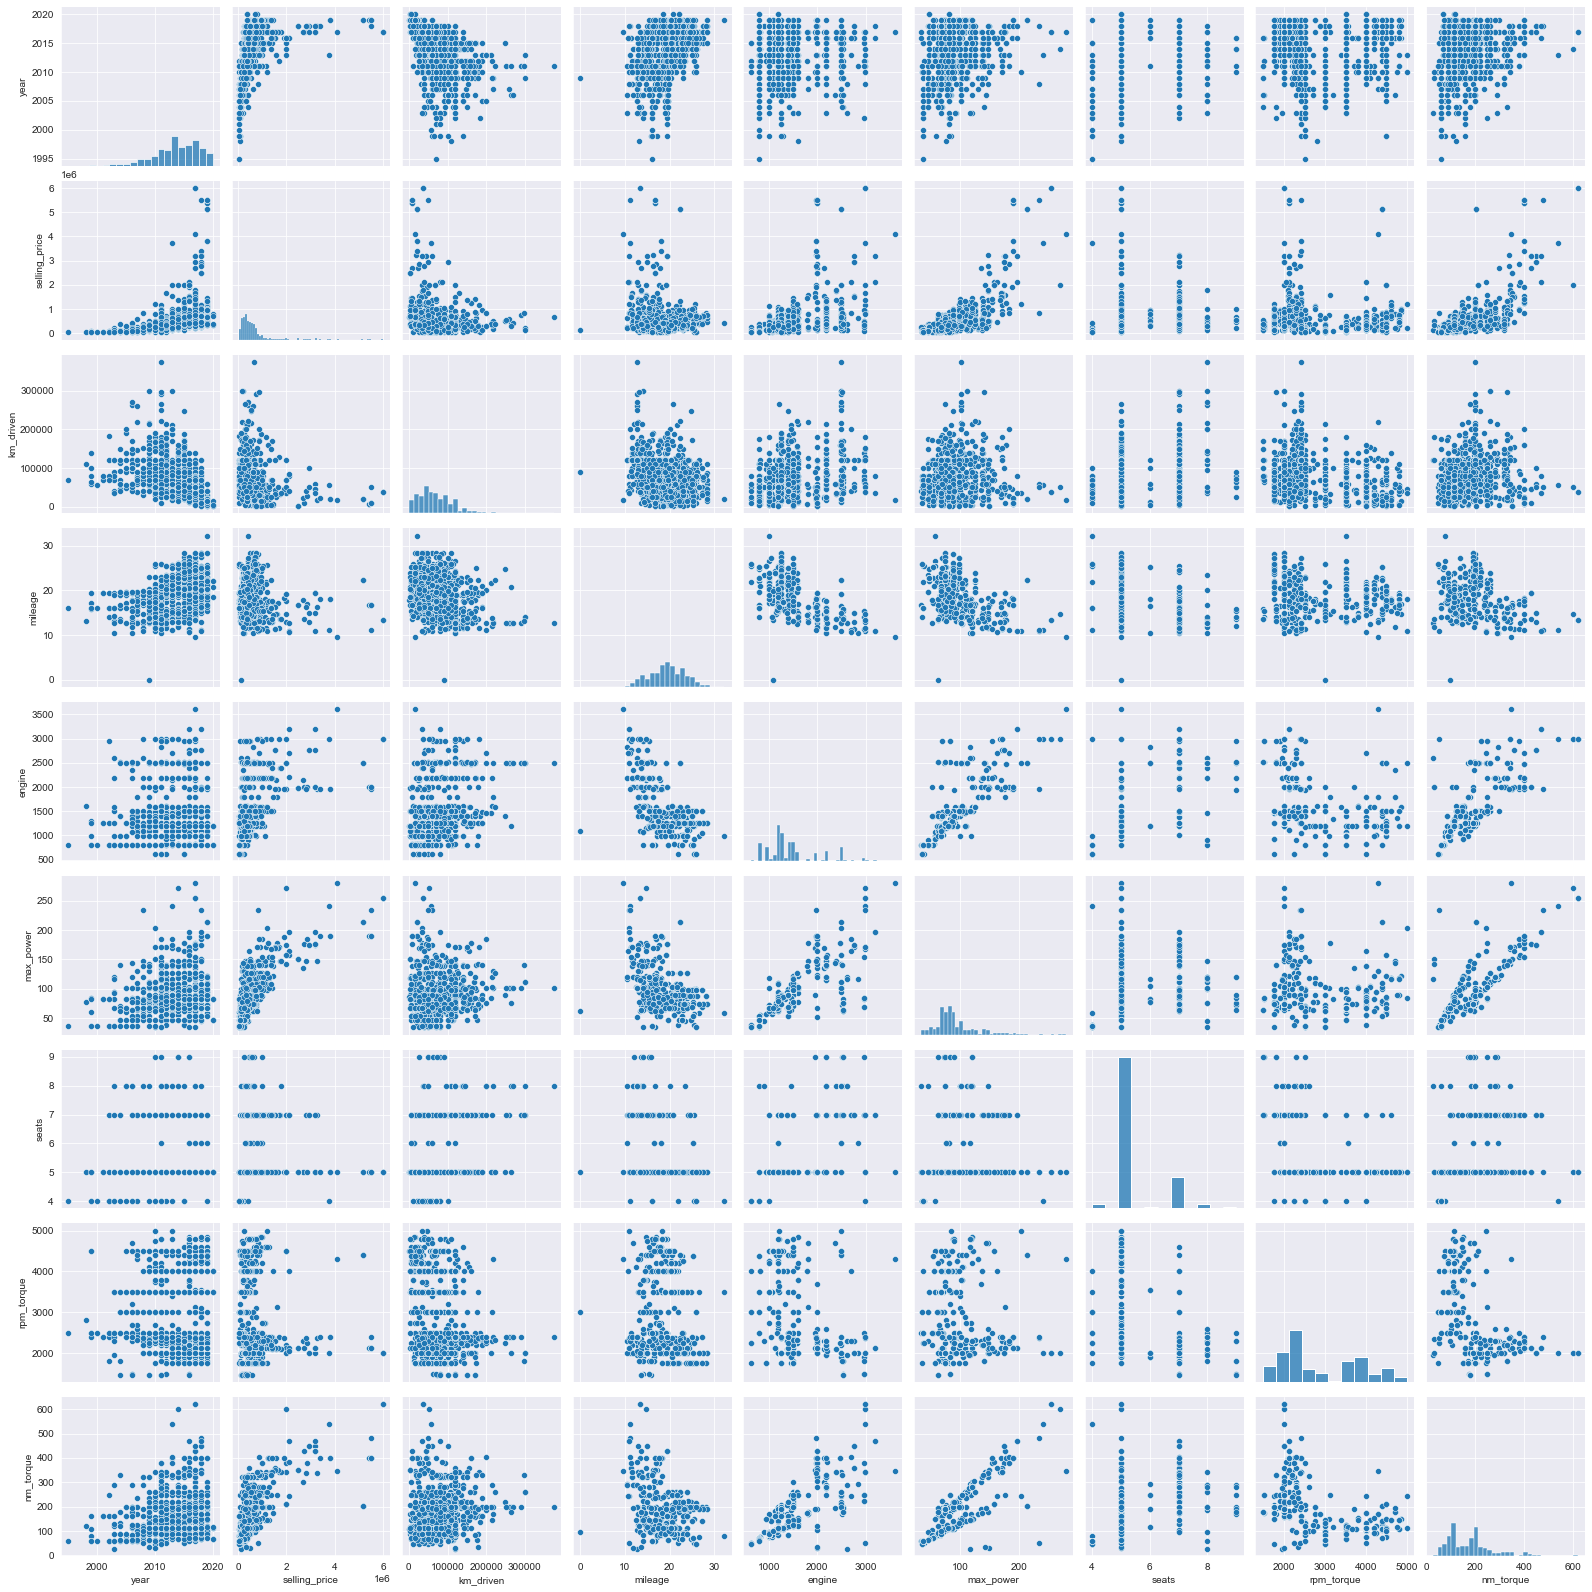

In [150]:
sns.pairplot(df_test)

В целом похожи, но в тренировочной выборке есть выбросы в признаках: km_driven и rpm_torque, которых нет в тестовой выборке.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

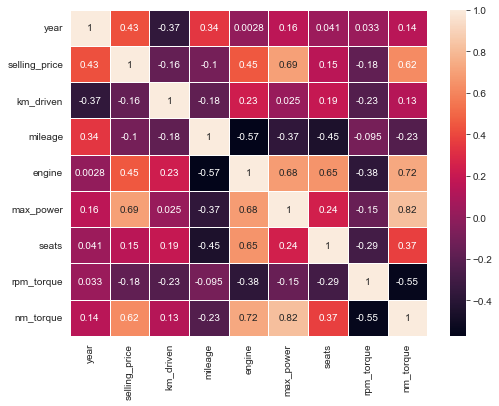

In [151]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_train.corr(), linewidth=.5, annot=True)
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1) между **rpm_torque** & **km_driven** самая низкая корреляция - -0.00012, линейной зависимости совершенно нет
2) довольго сильная корреляция наблюдается между следующими признаками:
    - **nm_torque** & **max_power** что очевидно, потому что чем выше мощность автомобиля тем выше и крутящий момент
    - **nm_torque** & **engine**
    - **engine** & **seats** литраж(engine) в значительной степени отражает мощность автомобиля, отсюда и зависимость междку engine и seats, ведь чем больше людей вмещает в себя автомобиль, тем больше мощности ему нужно, для комфортной езды
    - **engine** & **max_power** - здесь тоже очевидная связь, чем больше мощность двигателя, тем больший объем топлива ему нужен в момент времени
3) в какой-то степени так сказать можно и это логично, но здесь мы наблюдаем не сильную обратную корреляцию - всего-лишь -0.37, но тем не менее, эта связь есть

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

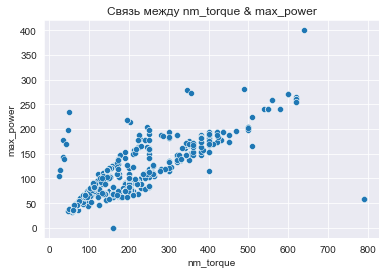

In [152]:
sns.scatterplot(df_train['nm_torque'], df_train['max_power'])
plt.title('Cвязь между nm_torque & max_power')
plt.show()

- действительно, визуально очень хорошо видна линейная связь между признаками nm_torque & max_power

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

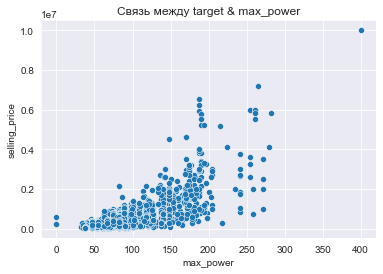

In [153]:
sns.scatterplot(df_train['max_power'], df_train[target])
plt.title('Cвязь между target & max_power')
plt.show()

- стоит отметить линейную зависимость между целевой переменной и max_power, она самая высокая между всеми парами, поэтому если мы будем удалять один из признаков nm_torque или max_power для борьбы с мультиколлениарностью, то удалить нужно nm_torque, так как у него ниже связь с целевой переменной

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [154]:
# выделим вещественные признаки

num_cols = df_train.drop(target, axis=1).columns[df_train.drop(target, axis=1).dtypes != 'object']

In [155]:
y_train = df_train[target]
X_train = df_train[num_cols]

In [156]:
assert X_train.shape == (5840, 8)

In [157]:
y_test = df_test[target]
X_test = df_test[num_cols]

In [158]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# инициализизация модель
lr = LinearRegression()

# обучение модели
lr.fit(X_train, y_train)

# прогноз
test_prediction = lr.predict(X_test)
train_prediction = lr.predict(X_train)

# метрики
train_r = r2_score(train_prediction, y_train)
test_r = r2_score(test_prediction, y_test)
train_mse = MSE(train_prediction, y_train)
test_mse = MSE(test_prediction, y_test)

print(f"R2 train: {train_r}, R2 test: {test_r}")
print(f"MSE train: {train_mse}, MSE test: {test_mse}")

R2 train: 0.3410672957144615, R2 test: -0.11254743348740703
MSE train: 113853548705.23279, MSE test: 229252897605.75125


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [160]:
from sklearn.preprocessing import StandardScaler

# инициализация
ss = StandardScaler()

# подгонка
ss.fit(X_train)

# стандартизация
X_train_scaled = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [161]:
# save standard scaler

pickle.dump(ss, open('standardscaler.pkl', 'wb'))

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [162]:
# датафрейм из признаков с их кф

coefs = pd.DataFrame({
    'feature': X_train.columns,
    'coef': lr.coef_
})

# признак с максимальным кф
coefs[coefs['coef'] == coefs['coef'].max()]

,feature,coef
0,year,40133.933005


- year - самый информативный признак, но кф кажется завышенным, что говорит о переобученности модели.

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [163]:
from sklearn.linear_model import Lasso

# инициализизация модель
lasso = Lasso()

# обучение модели
lasso.fit(X_train_scaled, y_train)

# прогноз
train_prediction_lasso = lasso.predict(X_train_scaled)
test_prediction_lasso = lasso.predict(X_test_scaled)

# метрики
train_r = r2_score(train_prediction_lasso, y_train)
test_r = r2_score(test_prediction_lasso, y_test)
train_mse = MSE(train_prediction_lasso, y_train)
test_mse = MSE(test_prediction_lasso, y_test)

print(f"R2 train: {train_r}, R2 test: {test_r}")
print(f"MSE train: {train_mse}, MSE test: {test_mse}")

R2 train: 0.3410622001570287, R2 test: -0.11255927152664147
MSE train: 113853548718.58775, MSE test: 229253626751.67624


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [164]:
lasso.coef_

array([164357.1349037 , -50340.51259584, -13176.94924213,  11012.99263869,
       293051.0768992 , -33673.05543523, -45178.58409781,  51613.47951957])

- с гиперпараметрами по умолчанию веса ни одного признака не занулилось, потому что по умолчанию **alpha** = 1

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [165]:
%%time
from sklearn.model_selection import GridSearchCV

# параметры для перебора
params = {'alpha': np.linspace(0, 1, 50)[1:-1]}

# инициализация модели
l = Lasso()
gs = GridSearchCV(estimator=l, param_grid=params, cv=10)

# обучение
gs.fit(X_train_scaled, y_train)

print(f'Best params: {gs.best_params_}')

Best params: {'alpha': 0.9795918367346939}
CPU times: user 19.3 s, sys: 5.18 s, total: 24.5 s
Wall time: 4.77 s


In [166]:
# прогноз
test_prediction_gs = gs.best_estimator_.predict(X_test_scaled)
train_prediction_gs = gs.best_estimator_.predict(X_train_scaled)

# метрики
train_r = r2_score(train_prediction_gs, y_train)
test_r = r2_score(test_prediction_gs, y_test)
train_mse = MSE(train_prediction_gs, y_train)
test_mse = MSE(test_prediction_gs, y_test)

print(f"R2 train: {train_r}, R2 test: {test_r}")
print(f"MSE train: {train_mse}, MSE test: {test_mse}")

R2 train: 0.34106230326972053, R2 test: -0.11255903155577696
MSE train: 113853548718.04645, MSE test: 229253611943.82062


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

- ргид-серч обучался 4 секунды

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [167]:
print(f"Лучший кф регуляризации: {gs.best_params_['alpha']}")

Лучший кф регуляризации: 0.9795918367346939


In [64]:
gs.best_estimator_.coef_

array([164357.18022295, -50340.53168908, -13177.01565977,  11013.03318211,
       293051.06250645, -33673.13650032, -45178.6354971 ,  51613.4645696 ])

- ни один из весов не занулился

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [169]:
%%time
from sklearn.linear_model import ElasticNet

# параметры для перебора
params = {"max_iter": [1, 5, 10],
          "alpha": np.linspace(0, 1, 10),
          "l1_ratio": np.linspace(0, 1, 10)}

# инициализация модели
enet = ElasticNet()
gs = GridSearchCV(estimator=enet, param_grid=params, cv=10)

# обучение
gs.fit(X_train_scaled, y_train)

print(f'Best params: {gs.best_params_}')

Best params: {'alpha': 0.5555555555555556, 'l1_ratio': 0.6666666666666666, 'max_iter': 10}
CPU times: user 36.5 s, sys: 12.1 s, total: 48.5 s
Wall time: 7.79 s


In [170]:
# прогноз
test_prediction_gs = gs.best_estimator_.predict(X_test_scaled)
train_prediction_gs = gs.best_estimator_.predict(X_train_scaled)

# метрики
train_r = r2_score(train_prediction_gs, y_train)
test_r = r2_score(test_prediction_gs, y_test)
train_mse = MSE(train_prediction_gs, y_train)
test_mse = MSE(test_prediction_gs, y_test)

print(f"R2 train: {train_r}, R2 test: {test_r}")
print(f"MSE train: {train_mse}, MSE test: {test_mse}")

R2 train: 0.17652029993481666, R2 test: -0.46902008777690063
MSE train: 116555213228.89796, MSE test: 247608516667.57086


- метрики не улучшились

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [171]:
print(f'Лучшие гиперпараметры: {gs.best_params_}')

Лучшие гиперпараметры: {'alpha': 0.5555555555555556, 'l1_ratio': 0.6666666666666666, 'max_iter': 10}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [172]:
# удаляем целевую переменную и название авто

df_train.drop([target, 'name'], inplace=True, axis=1)

In [173]:
# отбираем только категориальные фичи

X_train_cat = df_train[df_train.columns[df_train.dtypes == 'object']]

In [174]:
assert X_train_cat.shape == (5840, 4)

In [175]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [176]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

ohe.fit(X_train_cat)

train_encoded = pd.DataFrame(ohe.transform(X_train_cat), columns=ohe.get_feature_names())
test_encoded = pd.DataFrame(ohe.transform(df_test[X_train_cat.columns]), columns=ohe.get_feature_names())

In [73]:
# save ohe model

pickle.dump(ohe, open('ohe.pkl', 'wb'))

In [178]:
# удалим по одному признаку из каждой onehot группы

first_unique_values = []

for col in X_train_cat:
    first_unique_values.append(X_train_cat[col].unique()[0])

for col in train_encoded:
    for value in first_unique_values:
        if value in col:
            train_encoded.drop(col, axis=1, inplace=True)
            test_encoded.drop(col, axis=1, inplace=True)

In [216]:
# соединим категориальные признаки с числовыми

X_train_whole = pd.concat([train_encoded, X_train_scaled], axis=1)
X_test_whole = pd.concat([test_encoded, X_test_scaled], axis=1)

In [180]:
assert X_train_whole.shape[1] == X_test_whole.shape[1]

In [124]:
# save features names

with open('features_names.pkl', 'wb') as f:
   pickle.dump(X_test_whole.columns, f)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [183]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# параметры для перебора
params = {'alpha': np.linspace(0, 1, 10)}

# инициализация модели
ridge = Ridge()
gs = GridSearchCV(estimator=ridge, param_grid=params, scoring='r2')

# обучение
gs.fit(X_train_whole, y_train)

print(f"Best params: {gs.best_params_}")

Best params: {'alpha': 1.0}


In [184]:
# прогноз
test_prediction_gs = gs.best_estimator_.predict(X_test_whole)
train_prediction_gs = gs.best_estimator_.predict(X_train_whole)

# метрики
train_r = r2_score(train_prediction_gs, y_train)
test_r = r2_score(test_prediction_gs, y_test)
train_mse = MSE(train_prediction_gs, y_train)
test_mse = MSE(test_prediction_gs, y_test)

print(f"R2 train: {train_r}, R2 test: {test_r}")
print(f"MSE train: {train_mse}, MSE test: {test_mse}")

R2 train: 0.48427514958631435, R2 test: 0.12519706445937373
MSE train: 96715672791.91588, MSE test: 206699751933.27603


- удалось улучшить все метрики

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Посмотрим на распределение целевой переменной

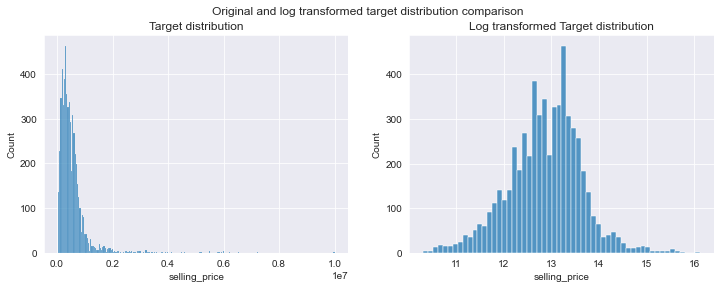

In [202]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(y_train, ax=ax[0])
sns.histplot(np.log(y_train), ax=ax[1])

fig.suptitle('Original and log transformed target distribution comparison')
ax[0].set_title('Target distribution')
ax[1].set_title('Log transformed Target distribution')

plt.show()

- прологарифмированный таргет выглядит гораздо более нормально распределенным

In [204]:
gs.fit(X_train_whole, np.log(y_train))

# прогноз
test_prediction_gs = np.expm1(gs.best_estimator_.predict(X_test_whole))
train_prediction_gs = np.expm1(gs.best_estimator_.predict(X_train_whole))

# метрики
train_r = r2_score(train_prediction_gs, y_train)
test_r = r2_score(test_prediction_gs, y_test)
train_mse = MSE(train_prediction_gs, y_train)
test_mse = MSE(test_prediction_gs, y_test)

print(f"R2 train: {train_r}, R2 test: {test_r}")
print(f"MSE train: {train_mse}, MSE test: {test_mse}")

R2 train: 0.7775558537886187, R2 test: 0.6781660177215272
MSE train: 54012485320.52727, MSE test: 101296620625.34029


- R2 на тестовой выборке подскочил с 0.12 до 0.67, помимо этого метрика не сильно проседает по сравнению с прогнозом обучающей выборки
- MSE понизился в 2 раза

Посмотрим на веса

In [208]:
gs.best_estimator_.coef_

array([-0.22696826, -0.03511834, -0.16062151,  0.09407768,  0.14770633,
        0.18043748, -0.13536429, -0.08554799,  0.66786933, -0.09806829,
        0.44031426, -0.01357007,  0.04510934,  0.11107393,  0.29955284,
        0.03519257, -0.00367149, -0.00666054])

- все веса выглядят адекватно, одним только логарифмированием нам удалось избавиться от переобучения

Попробуем удалить выбросы из km_driven & rpm_torque

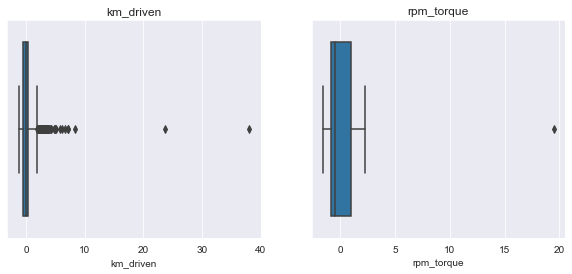

In [212]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(X_train_whole['km_driven'], ax=ax[0])
sns.boxplot(X_train_whole['rpm_torque'], ax=ax[1])

ax[0].set_title('km_driven')
ax[1].set_title('rpm_torque')

plt.show()

In [219]:
km_driven_outliers = X_train_whole[X_train_whole['km_driven'] > 20].index
rpm_torque_outliers = X_train_whole[X_train_whole['rpm_torque'] > 15].index

In [226]:
X_train_whole.drop(km_driven_outliers, inplace=True)
X_train_whole.drop(rpm_torque_outliers, inplace=True)

y_train.drop(km_driven_outliers, inplace=True)
y_train.drop(rpm_torque_outliers, inplace=True)

In [228]:
X_train_whole.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

Теперь снова обучим модель

In [229]:
gs.fit(X_train_whole, np.log(y_train))

# прогноз
test_prediction_gs = np.expm1(gs.best_estimator_.predict(X_test_whole))
train_prediction_gs = np.expm1(gs.best_estimator_.predict(X_train_whole))

# метрики
train_r = r2_score(train_prediction_gs, y_train)
test_r = r2_score(test_prediction_gs, y_test)
train_mse = MSE(train_prediction_gs, y_train)
test_mse = MSE(test_prediction_gs, y_test)

print(f"R2 train: {train_r}, R2 test: {test_r}")
print(f"MSE train: {train_mse}, MSE test: {test_mse}")

R2 train: 0.7835303026289613, R2 test: 0.686467388877407
MSE train: 53054893981.90441, MSE test: 99994313805.87001


In [234]:
# model weights

gs.best_estimator_.coef_

array([-0.23255241, -0.03903537, -0.17401223,  0.08882403,  0.14549316,
        0.17527984, -0.12749513, -0.0815318 ,  0.68510536, -0.09083538,
        0.4328272 , -0.04279903,  0.04399894,  0.11517213,  0.30117976,
        0.03610518, -0.00752022, -0.01246721])

- удаление выбросов помогло еще немного поднять R2 и опутстить MSE
- веса модели так же адекватны

In [230]:
# save the model

pickle.dump(gs.best_estimator_, open('gs_best_estimator.pkl', 'wb'))

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [126]:
def business_metrics(y_true, y_pred, thresh):
    """
    Доля прогнозов с ошибкой <= thresh %

    :param y_true: actual values
    :param y_pred: predictions
    :param thresh: threshold
    :return: float
    """
    metric = np.mean(np.abs(y_true - y_pred) / y_true * 100 < thresh)

    return metric


business_metrics(y_true=y_test, y_pred=test_prediction, thresh=10)

0.243

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллекцией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link